# import data(finished)


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from numpy import where
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer
from imblearn.over_sampling import RandomOverSampler
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import StratifiedKFold


In [2]:
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
#Mutual Info
from sklearn.feature_selection import mutual_info_classif, SelectPercentile 
#pd.set_option('display.max_rows', 400000)

In [3]:
file = 'application_data.csv'
df = pd.read_csv(file)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#checking the info and dtypes
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
df.shape

(307511, 122)

In [6]:
defaulters=df[df.TARGET==1]
nondefaulters=df[df.TARGET==0]

In [7]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

# data preprocessing(data imputation)

In [8]:
#Find out the distribution of target variable
defaulters=df[df.TARGET==1]
nondefaulters=df[df.TARGET==0]

percentage_defaulters=(len(defaulters)*100)/len(df)
percentage_nondefaulters=(len(nondefaulters)*100)/len(df)

print("The Percentage of people who have paid their loan is:",round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:",round(len(nondefaulters)/len(defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


In [9]:
#Identify the missing value and the percentage

In [10]:
#Function to calculate the percentage of missing value
def null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output

#Find out which colums have more than 50% missing values
Null_col_percentage=null_percentage(df)
Null_col_50 = Null_col_percentage[Null_col_percentage>50]

In [11]:
Null_col_50.head(30).sort_values(ascending = False)

COMMONAREA_MEDI             69.87
COMMONAREA_MODE             69.87
COMMONAREA_AVG              69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MODE       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
OWN_CAR_AGE                 65.99
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
ELEVATORS_AVG               53.30
ELEVATORS_MODE              53.30
APARTMENTS_MEDI             50.75
APARTMENTS_AVG              50.75
APARTMENTS_MODE             50.75
ENTRANCES_AVG               50.35
ENTRANCES_MODE              50.35
LIVINGAREA_MODE             50.19
LIVINGAREA_AVG

In [12]:
print("Number of colums with more than 50% missing values :", (Null_col_percentage>50).sum())

Number of colums with more than 50% missing values : 41


In [13]:
#Removed 41 columns with more than 50% missing value percentage
df_new = df.drop(Null_col_50.index, axis =1)
df_new = df_new.drop(['SK_ID_CURR'], axis=1)
df_new.shape

(307511, 80)

In [14]:
#Seprate the data to different data types
print("Integer type values:",np.count_nonzero(df_new.select_dtypes('int64').columns))
print(df_new.select_dtypes('int64').columns)

Integer type values: 40
Index(['TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


In [15]:
print("Float type values:",np.count_nonzero(df_new.select_dtypes('float').columns))
print(df_new.select_dtypes('float').columns)

Float type values: 27
Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
       'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


In [16]:
print("Object type values:",np.count_nonzero(df_new.select_dtypes('object').columns))
print(df_new.select_dtypes('object').columns)

Object type values: 13
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')


In [17]:
#Check the null percentage of "integer" data 
Null_int_percentage=null_percentage(df_new.select_dtypes('int64'))
Null_int_percentage

TARGET                         0.0
CNT_CHILDREN                   0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10    

In [18]:
#Check the null percentage of "integer" data 
Null_int_percentage=null_percentage(df_new.select_dtypes('int64'))
Null_int_percentage

TARGET                         0.0
CNT_CHILDREN                   0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
HOUR_APPR_PROCESS_START        0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_4                0.0
FLAG_DOCUMENT_5                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_7                0.0
FLAG_DOCUMENT_8                0.0
FLAG_DOCUMENT_9                0.0
FLAG_DOCUMENT_10    

In [19]:
#Using mean to impute the missing value of 'float' type value
def mean_impute(df,col):
    mean = df[col].mean()
    return df[col].replace(np.nan, mean)

df_new['EXT_SOURCE_2'] = mean_impute(df_new,'EXT_SOURCE_2')
df_new['EXT_SOURCE_3'] = mean_impute(df_new,'EXT_SOURCE_3')
df_new['YEARS_BEGINEXPLUATATION_AVG'] = mean_impute(df_new,'YEARS_BEGINEXPLUATATION_AVG')
df_new['FLOORSMAX_AVG'] = mean_impute(df_new,'FLOORSMAX_AVG')
df_new['YEARS_BEGINEXPLUATATION_MODE'] = mean_impute(df_new,'YEARS_BEGINEXPLUATATION_MODE')
df_new['FLOORSMAX_MODE'] = mean_impute(df_new,'FLOORSMAX_MODE')
df_new['YEARS_BEGINEXPLUATATION_MEDI'] = mean_impute(df_new,'YEARS_BEGINEXPLUATATION_MEDI')
df_new['FLOORSMAX_MEDI'] = mean_impute(df_new,'FLOORSMAX_MEDI')
df_new['TOTALAREA_MODE'] = mean_impute(df_new,'TOTALAREA_MODE')
df_new['OBS_30_CNT_SOCIAL_CIRCLE'] = mean_impute(df_new,'OBS_30_CNT_SOCIAL_CIRCLE')
df_new['DEF_30_CNT_SOCIAL_CIRCLE'] = mean_impute(df_new,'DEF_30_CNT_SOCIAL_CIRCLE')
df_new['OBS_60_CNT_SOCIAL_CIRCLE'] = mean_impute(df_new,'OBS_60_CNT_SOCIAL_CIRCLE')
df_new['DEF_60_CNT_SOCIAL_CIRCLE'] = mean_impute(df_new,'DEF_60_CNT_SOCIAL_CIRCLE')

In [20]:
Null_float_percentage=null_percentage(df_new.select_dtypes('float'))
Null_float_percentage

AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
REGION_POPULATION_RELATIVE       0.00
DAYS_REGISTRATION                0.00
CNT_FAM_MEMBERS                  0.00
EXT_SOURCE_2                     0.00
EXT_SOURCE_3                     0.00
YEARS_BEGINEXPLUATATION_AVG      0.00
FLOORSMAX_AVG                    0.00
YEARS_BEGINEXPLUATATION_MODE     0.00
FLOORSMAX_MODE                   0.00
YEARS_BEGINEXPLUATATION_MEDI     0.00
FLOORSMAX_MEDI                   0.00
TOTALAREA_MODE                   0.00
OBS_30_CNT_SOCIAL_CIRCLE         0.00
DEF_30_CNT_SOCIAL_CIRCLE         0.00
OBS_60_CNT_SOCIAL_CIRCLE         0.00
DEF_60_CNT_SOCIAL_CIRCLE         0.00
DAYS_LAST_PHONE_CHANGE           0.00
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CRED

In [21]:
#For the following value, we assume that no enquiry was made during the time causing null values and we can impute missing values in these columns with 0s
#AMT_REQ_CREDIT_BUREAU_HOUR 
#AMT_REQ_CREDIT_BUREAU_DAY
#AMT_REQ_CREDIT_BUREAU_WEEK
#AMT_REQ_CREDIT_BUREAU_MON
#AMT_REQ_CREDIT_BUREAU_QRT
#AMT_REQ_CREDIT_BUREAU_YEAR

def zero_impute(df,col):
    return df[col].replace(np.nan, 0)

df_new['AMT_REQ_CREDIT_BUREAU_HOUR'] = zero_impute(df_new,'AMT_REQ_CREDIT_BUREAU_HOUR')
df_new['AMT_REQ_CREDIT_BUREAU_DAY'] = zero_impute(df_new,'AMT_REQ_CREDIT_BUREAU_DAY')
df_new['AMT_REQ_CREDIT_BUREAU_WEEK'] = zero_impute(df_new,'AMT_REQ_CREDIT_BUREAU_WEEK')
df_new['AMT_REQ_CREDIT_BUREAU_MON'] = zero_impute(df_new,'AMT_REQ_CREDIT_BUREAU_MON')
df_new['AMT_REQ_CREDIT_BUREAU_QRT'] = zero_impute(df_new,'AMT_REQ_CREDIT_BUREAU_QRT')
df_new['AMT_REQ_CREDIT_BUREAU_YEAR'] = zero_impute(df_new,'AMT_REQ_CREDIT_BUREAU_YEAR')

In [22]:
Null_float_percentage=null_percentage(df_new.select_dtypes('float'))
Null_float_percentage

AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
REGION_POPULATION_RELATIVE      0.00
DAYS_REGISTRATION               0.00
CNT_FAM_MEMBERS                 0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
YEARS_BEGINEXPLUATATION_AVG     0.00
FLOORSMAX_AVG                   0.00
YEARS_BEGINEXPLUATATION_MODE    0.00
FLOORSMAX_MODE                  0.00
YEARS_BEGINEXPLUATATION_MEDI    0.00
FLOORSMAX_MEDI                  0.00
TOTALAREA_MODE                  0.00
OBS_30_CNT_SOCIAL_CIRCLE        0.00
DEF_30_CNT_SOCIAL_CIRCLE        0.00
OBS_60_CNT_SOCIAL_CIRCLE        0.00
DEF_60_CNT_SOCIAL_CIRCLE        0.00
DAYS_LAST_PHONE_CHANGE          0.00
AMT_REQ_CREDIT_BUREAU_HOUR      0.00
AMT_REQ_CREDIT_BUREAU_DAY       0.00
AMT_REQ_CREDIT_BUREAU_WEEK      0.00
AMT_REQ_CREDIT_BUREAU_MON       0.00
AMT_REQ_CREDIT_BUREAU_QRT       0.00
AMT_REQ_CREDIT_BUREAU_YEAR      0.00
d

In [23]:
#Check the null percentage of "object" data 
Null_object_percentage=null_percentage(df_new.select_dtypes('object'))
Null_object_percentage

NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
OCCUPATION_TYPE               31.35
WEEKDAY_APPR_PROCESS_START     0.00
ORGANIZATION_TYPE              0.00
EMERGENCYSTATE_MODE           47.40
dtype: float64

In [24]:
#Using mode to impute the missing value of 'object' type value
def mode_impute(df,col):
    return df[col].fillna(df[col].mode()[0])
df_new['EMERGENCYSTATE_MODE'] = mode_impute(df_new,'EMERGENCYSTATE_MODE')
df_new['OCCUPATION_TYPE'] = mode_impute(df_new,'OCCUPATION_TYPE')
df_new['NAME_TYPE_SUITE'] = mode_impute(df_new,'NAME_TYPE_SUITE')

In [25]:
Null_object_percentage=null_percentage(df_new.select_dtypes('object'))
Null_object_percentage

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
OCCUPATION_TYPE               0.0
WEEKDAY_APPR_PROCESS_START    0.0
ORGANIZATION_TYPE             0.0
EMERGENCYSTATE_MODE           0.0
dtype: float64

In [26]:
#Labelendcoding
le = LabelEncoder()
df_new['NAME_CONTRACT_TYPE'] = le.fit_transform(df_new['NAME_CONTRACT_TYPE'])
df_new['CODE_GENDER'] = le.fit_transform(df_new['CODE_GENDER'])
df_new['FLAG_OWN_CAR'] = le.fit_transform(df_new['FLAG_OWN_CAR'])
df_new['FLAG_OWN_REALTY'] = le.fit_transform(df_new['FLAG_OWN_REALTY'])
df_new['NAME_TYPE_SUITE'] = le.fit_transform(df_new['NAME_TYPE_SUITE'].astype(str))
df_new['NAME_INCOME_TYPE'] = le.fit_transform(df_new['NAME_INCOME_TYPE'])
df_new['NAME_EDUCATION_TYPE'] = le.fit_transform(df_new['NAME_EDUCATION_TYPE'])
df_new['NAME_FAMILY_STATUS'] = le.fit_transform(df_new['NAME_FAMILY_STATUS'])
df_new['NAME_HOUSING_TYPE'] = le.fit_transform(df_new['NAME_HOUSING_TYPE'])
df_new['OCCUPATION_TYPE'] = le.fit_transform(df_new['OCCUPATION_TYPE'].astype(str))
df_new['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(df_new['WEEKDAY_APPR_PROCESS_START'])
df_new['ORGANIZATION_TYPE'] = le.fit_transform(df_new['ORGANIZATION_TYPE'])
df_new['EMERGENCYSTATE_MODE'] = le.fit_transform(df_new['EMERGENCYSTATE_MODE'].astype(str))

In [27]:
#Funtion for potting box and hist

def plot_box(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=df_new[var]);
    plt.title('Box Plot of '+ '%s' %var , fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
plt.show()

def plot_hist(var):
    plt.subplot(1, 2, 2)
    s=plt.hist(x=df_new[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var , fontsize=10)
plt.show()

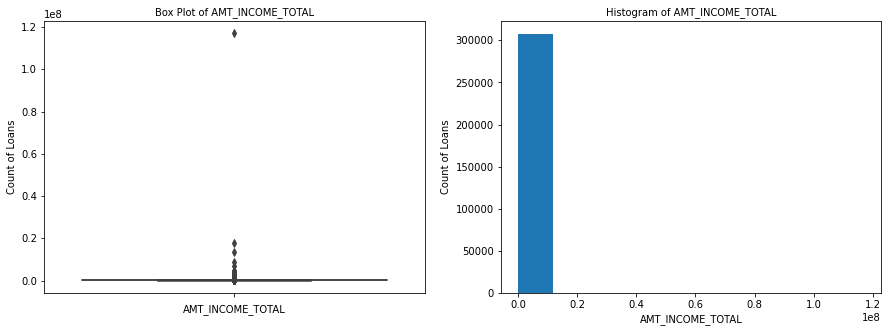

In [28]:
#Using box and hist to check outliers in 'AMT_INCOME_TOTAL'
plot_box('AMT_INCOME_TOTAL')
plot_hist('AMT_INCOME_TOTAL')

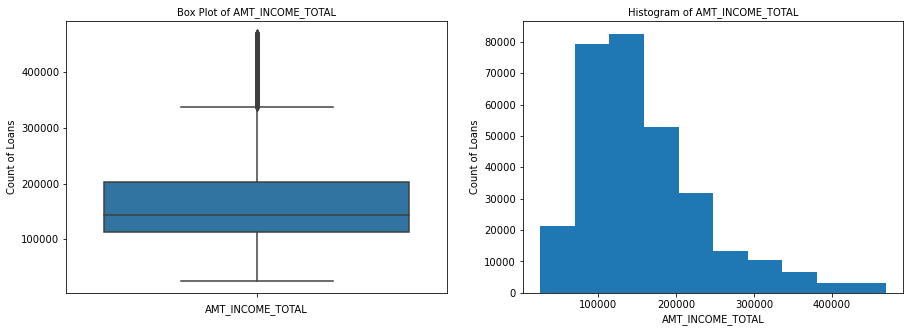

In [29]:
#As there are some outliers in 'AMT_INCOME_TOTAL', we need to remove it

#Removing all entries above 99 percentile
df_new=df_new[df_new.AMT_INCOME_TOTAL<np.nanpercentile(df_new['AMT_INCOME_TOTAL'], 99)]

plot_box('AMT_INCOME_TOTAL')
plot_hist('AMT_INCOME_TOTAL')

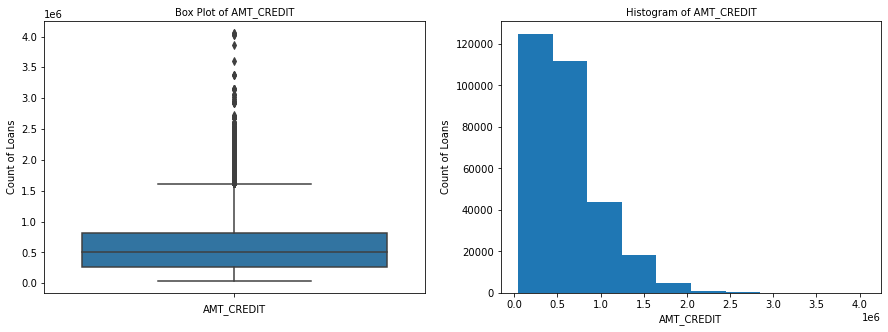

In [30]:
#Using box and hist to check outliers in 'AMT_CREDIT'
plot_box('AMT_CREDIT')
plot_hist('AMT_CREDIT')

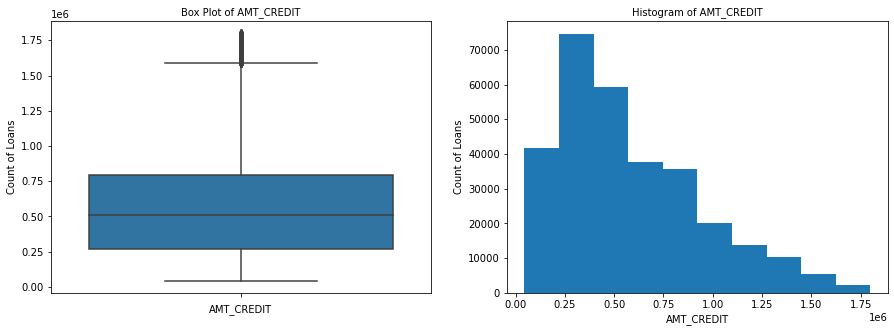

In [31]:
#As there are some outliers in 'AMT_CREDIT', we need to remove it

#Removing all entries above 99 percentile
df_new=df_new[df_new.AMT_CREDIT<np.nanpercentile(df_new['AMT_CREDIT'], 99)]

plot_box('AMT_CREDIT')
plot_hist('AMT_CREDIT')

/Users/iris/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/iris/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


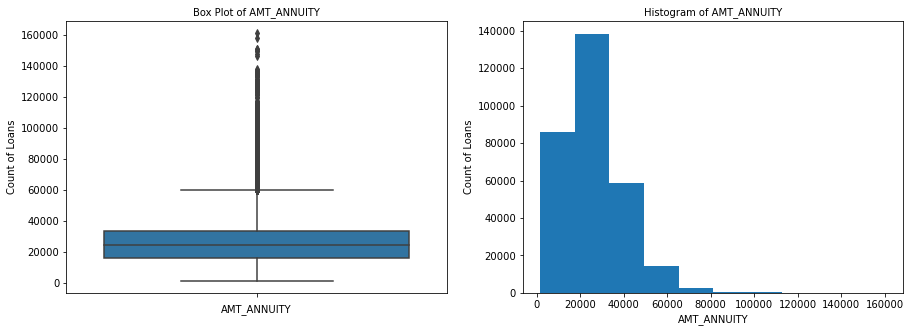

In [32]:
#Using box and hist to check outliers in 'AMT_ANNUITY'
plot_box('AMT_ANNUITY')
plot_hist('AMT_ANNUITY')

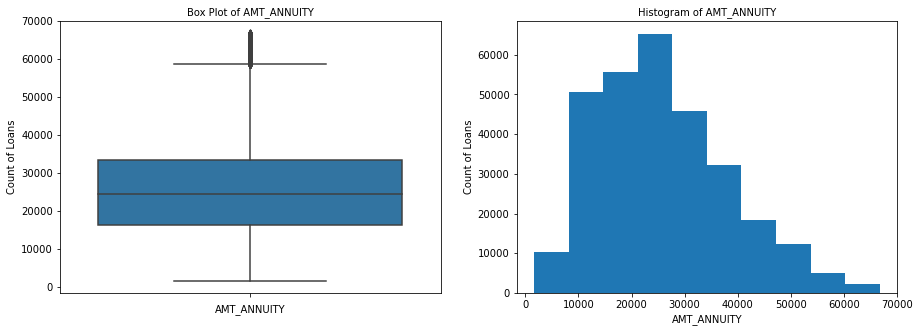

In [33]:
#As there are some outliers in 'AMT_ANNUITY', we need to remove it

#Removing all entries above 99 percentile
df_new=df_new[df_new.AMT_ANNUITY<np.nanpercentile(df_new['AMT_ANNUITY'], 99)]

plot_box('AMT_ANNUITY')
plot_hist('AMT_ANNUITY')

/Users/iris/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/iris/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


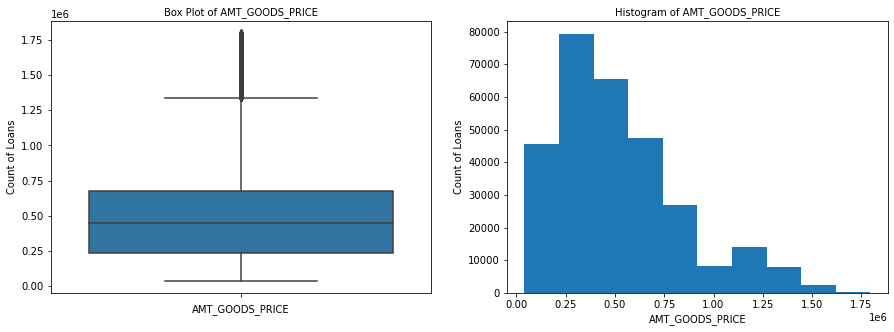

In [34]:
#Using box and hist to check outliers in 'AMT_GOODS_PRICE'
plot_box('AMT_GOODS_PRICE')
plot_hist('AMT_GOODS_PRICE')

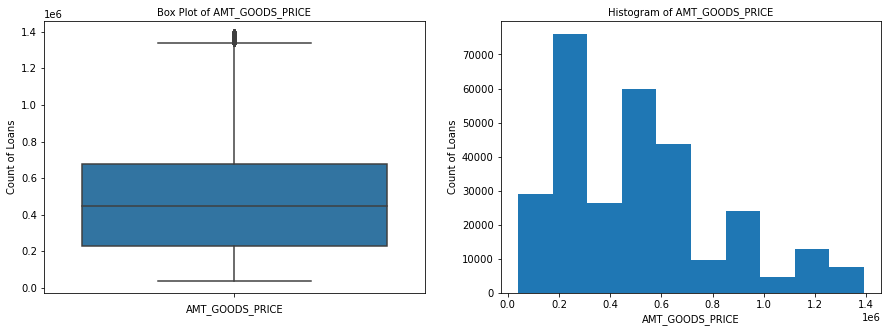

In [35]:
#As there are some outliers in 'AMT_GOODS_PRICE', we need to remove it

#Removing all entries above 99 percentile
df_new=df_new[df_new.AMT_GOODS_PRICE<np.nanpercentile(df_new['AMT_GOODS_PRICE'], 99)]

plot_box('AMT_GOODS_PRICE')
plot_hist('AMT_GOODS_PRICE')

# feature engineering/feature selection/filter model

# data exploration/visualization(box plot,Correlation matrix with Seaborn,xxxx)

In [36]:
def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

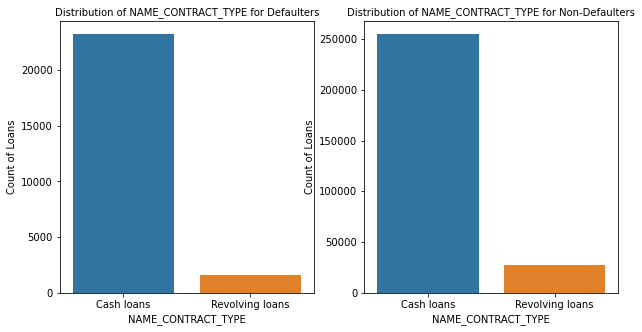

In [37]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

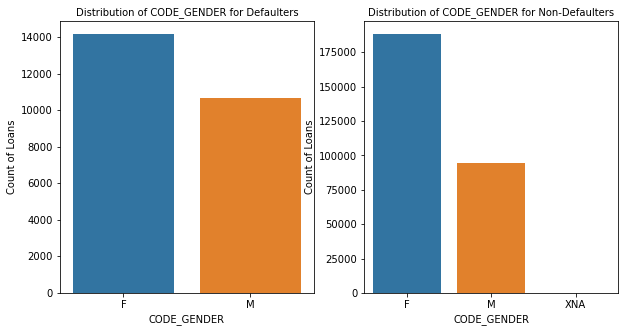

In [38]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

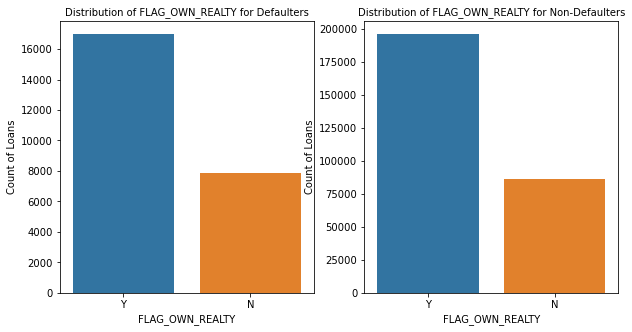

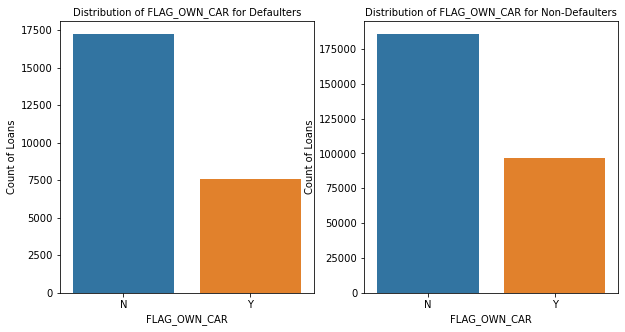

In [39]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

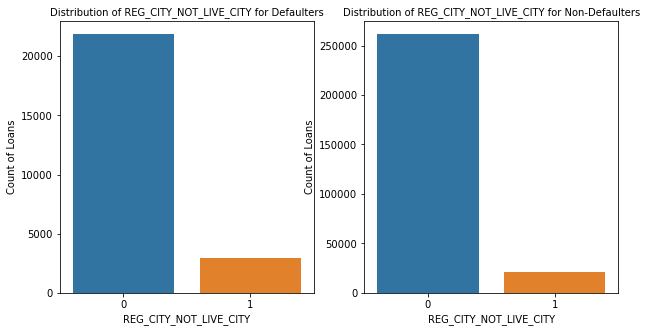

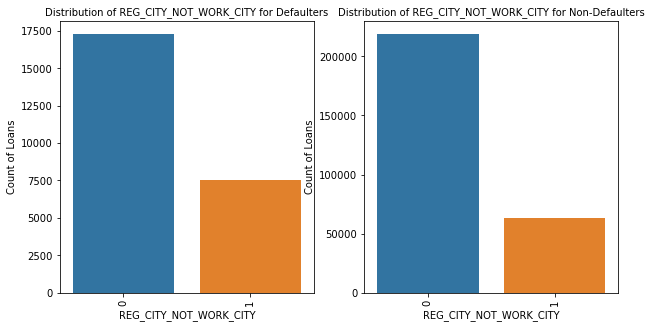

In [40]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

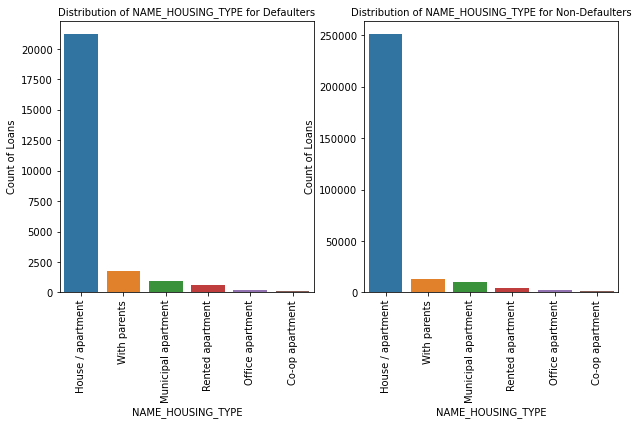

In [41]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

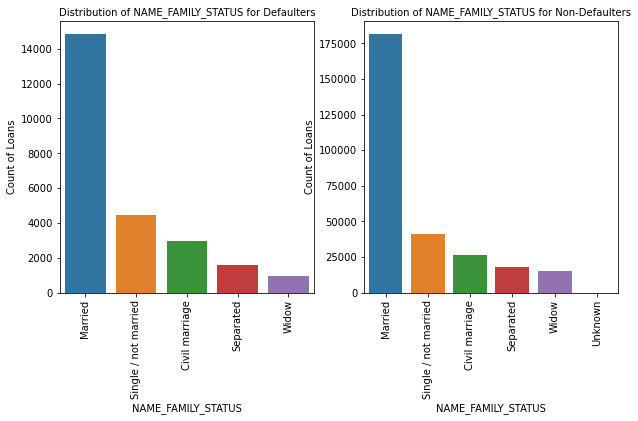

In [42]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

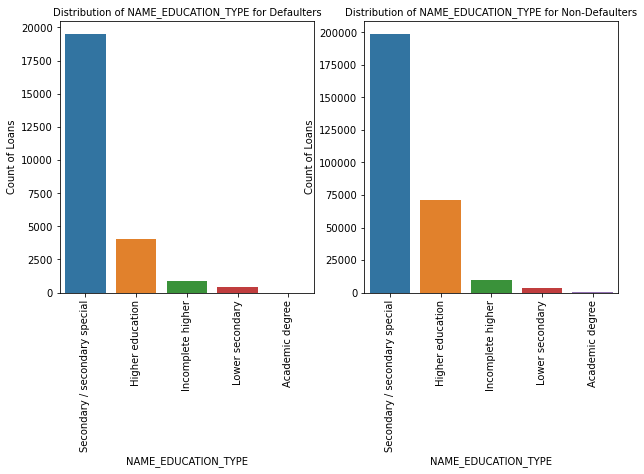

In [43]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

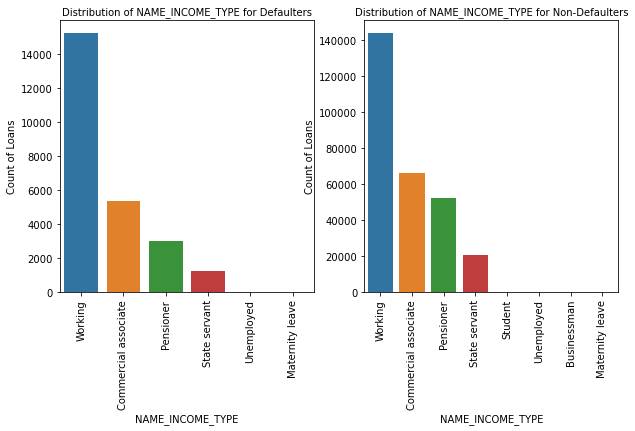

In [44]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

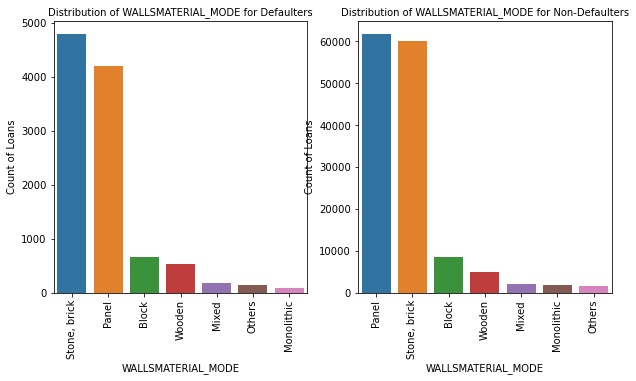

In [45]:
plot_charts('WALLSMATERIAL_MODE', label_rotation=True,horizontal_layout=True)

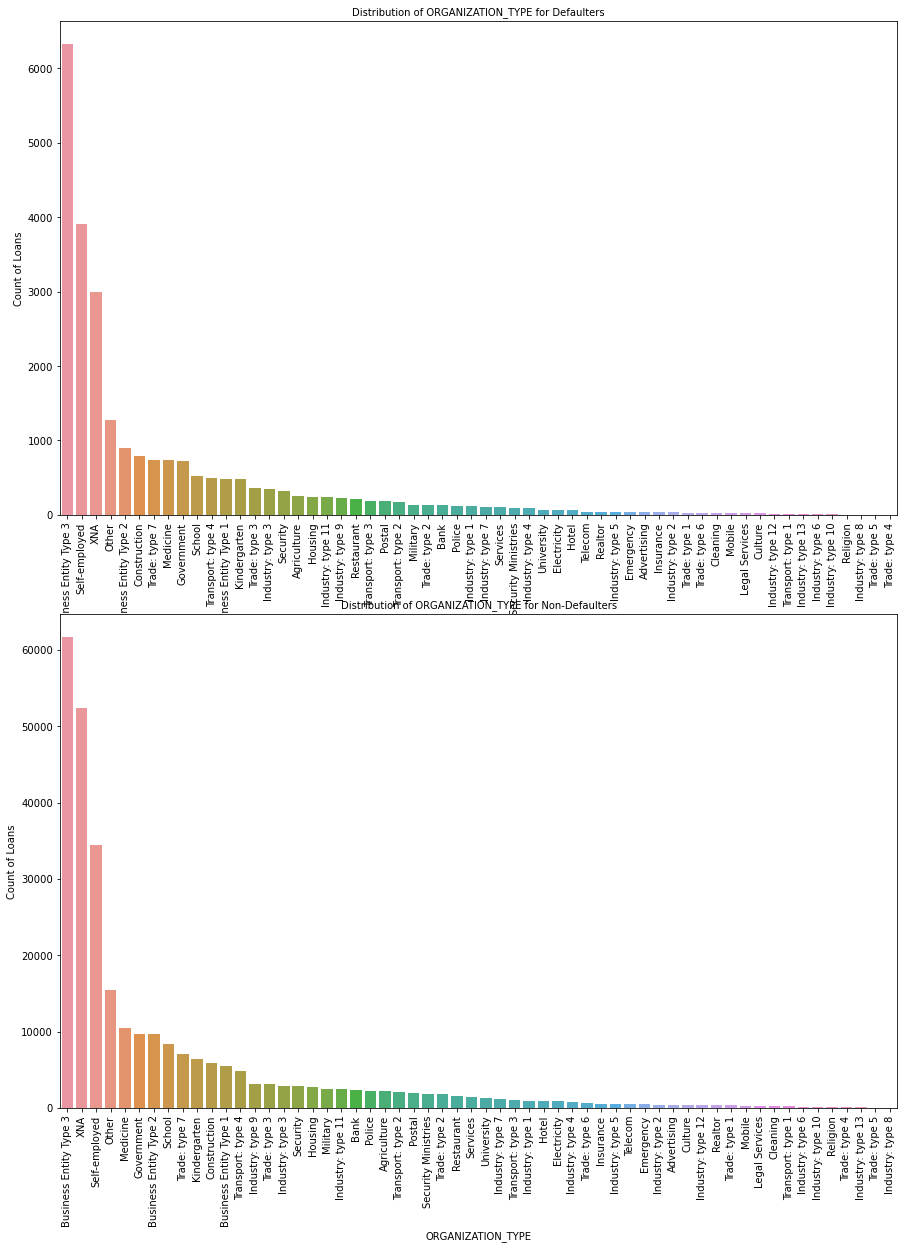

In [46]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

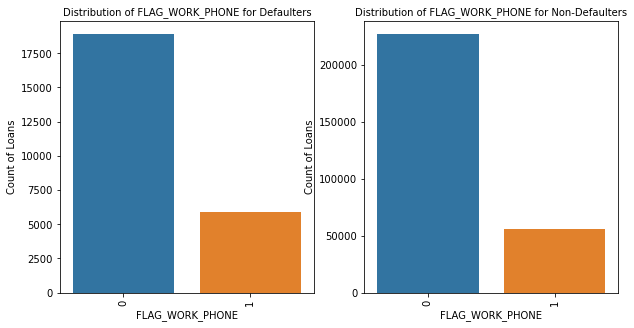

In [47]:
plot_charts('FLAG_WORK_PHONE', label_rotation=True,horizontal_layout=True)

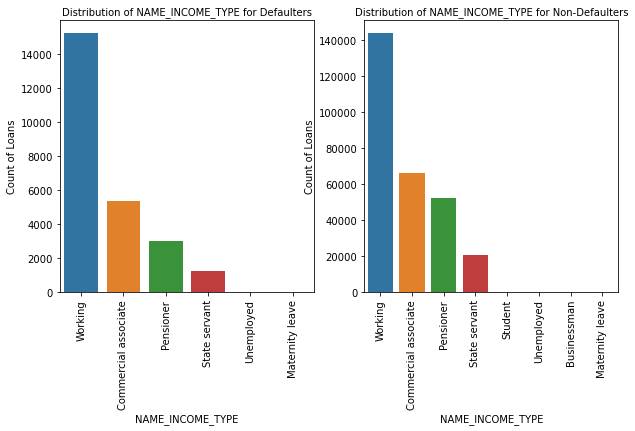

In [48]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

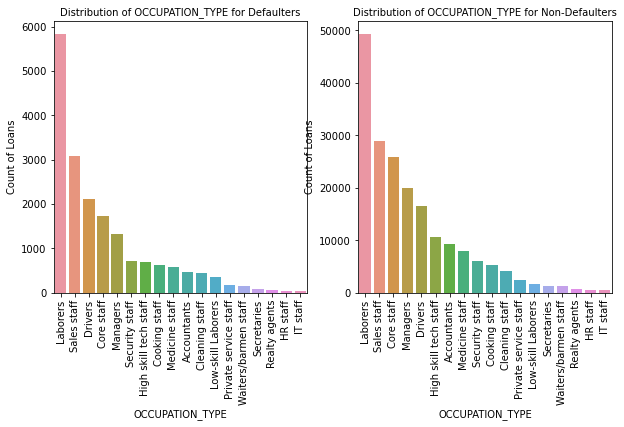

In [49]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

In [50]:
cols=['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [51]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_1,1.000,0.140,0.171,0.189,0.108,-0.051,-0.130,0.181,0.010,-0.160,0.085,-0.091,0.018,-0.068,-0.070,-0.117,0.276,-0.570
EXT_SOURCE_3,0.140,1.000,0.078,0.079,0.041,-0.020,-0.065,0.078,-0.015,-0.086,-0.010,-0.020,-0.046,0.008,0.011,-0.128,0.094,-0.172
EXT_SOURCE_2,0.171,0.078,1.000,0.131,0.116,0.002,-0.208,0.121,0.007,-0.070,0.170,-0.012,0.135,-0.249,-0.251,-0.060,-0.001,-0.109
AMT_GOODS_PRICE,0.189,0.079,0.131,1.000,0.753,0.047,-0.118,0.983,0.038,-0.026,0.076,-0.008,0.044,-0.077,-0.066,-0.056,0.004,-0.136
AMT_ANNUITY,0.108,0.041,0.116,0.753,1.000,0.076,-0.080,0.752,0.046,0.034,0.072,0.031,0.031,-0.089,-0.074,-0.017,-0.083,-0.014
CNT_FAM_MEMBERS,-0.051,-0.020,0.002,0.047,0.076,1.000,-0.013,0.051,0.007,0.146,-0.030,0.885,-0.028,0.048,0.044,-0.032,-0.187,0.203
DAYS_LAST_PHONE_CHANGE,-0.130,-0.065,-0.208,-0.118,-0.080,-0.013,1.000,-0.111,-0.002,0.072,-0.055,0.012,-0.023,0.019,0.018,0.124,0.003,0.111
AMT_CREDIT,0.181,0.078,0.121,0.983,0.752,0.051,-0.111,1.000,0.038,-0.026,0.069,-0.002,0.032,-0.071,-0.059,-0.052,-0.001,-0.135
AMT_INCOME_TOTAL,0.010,-0.015,0.007,0.038,0.046,0.007,-0.002,0.038,1.000,0.000,0.009,0.005,0.014,-0.023,-0.021,-0.004,-0.015,0.003
DAYS_REGISTRATION,-0.160,-0.086,-0.070,-0.026,0.034,0.146,0.072,-0.026,0.000,1.000,-0.056,0.149,-0.033,0.100,0.104,0.097,-0.189,0.289


In [52]:
defaulters_correlation.head(10).index

Index(['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION'],
      dtype='object')

In [53]:
c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH            DAYS_BIRTH                     1.000000
AMT_CREDIT            AMT_GOODS_PRICE                0.983103
REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN          CNT_FAM_MEMBERS                0.885484
AMT_ANNUITY           AMT_GOODS_PRICE                0.752699
AMT_CREDIT            AMT_ANNUITY                    0.752195
DAYS_BIRTH            DAYS_REGISTRATION              0.289114
EXT_SOURCE_1          DAYS_EMPLOYED                  0.276063
DAYS_BIRTH            CNT_CHILDREN                   0.259109
                      DAYS_ID_PUBLISH                0.252863
dtype: float64

In [54]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_LAST_PHONE_CHANGE       EXT_SOURCE_2                  -0.207900
DAYS_ID_PUBLISH              DAYS_EMPLOYED                 -0.226470
REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.248859
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.250519
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.275703
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START       -0.293908
                             REGION_POPULATION_RELATIVE    -0.443236
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.446977
EXT_SOURCE_1                 DAYS_BIRTH                    -0.570054
DAYS_BIRTH                   DAYS_EMPLOYED                 -0.575097
dtype: float64

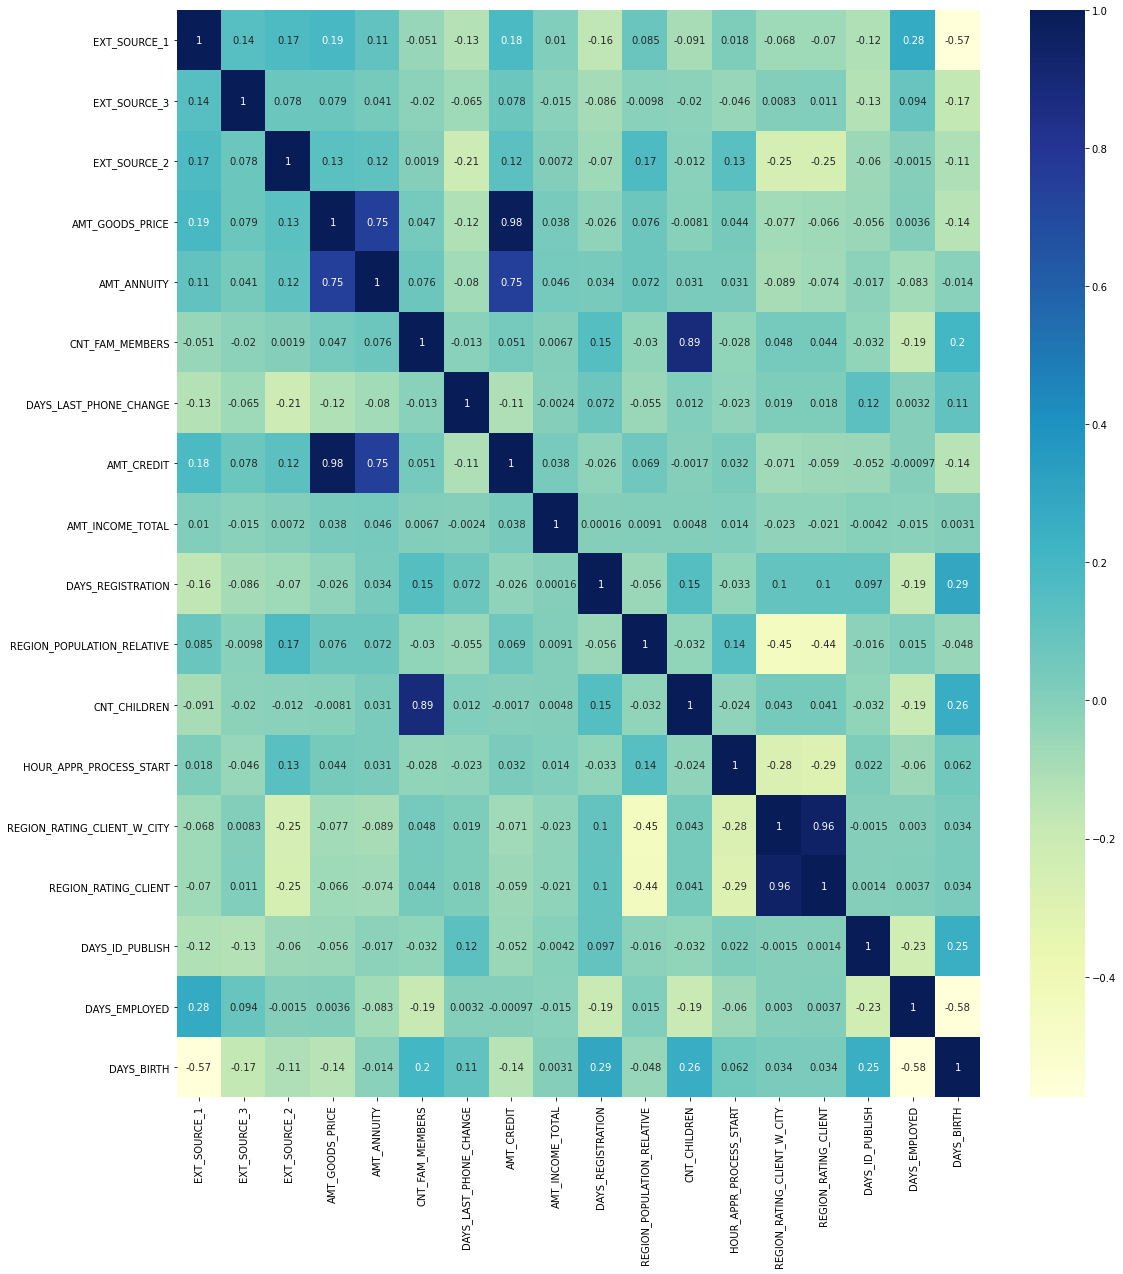

In [55]:
# figure size
plt.figure(figsize=(18,20))

# heatmap
sns.heatmap(defaulters_correlation, cmap="YlGnBu", annot=True)
plt.show()

In [56]:
df_new.dropna(inplace=True)

In [57]:
df_new.shape

(294195, 80)

In [64]:
X = df_new.drop(['TARGET'],axis = 1)
target = df_new['TARGET']
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size= 0.3, random_state = 0)
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (294195, 79)
Shape of y : (294195,)


In [65]:
# Calculate Mutual Information between each feature and the target


mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([1.07181203e-03, 6.71722815e-03, 4.22281105e-03, 2.02803490e-02,
       2.85122365e-03, 1.75112859e-03, 7.14843750e-03, 1.21155806e-02,
       5.88490200e-03, 2.91193585e-02, 1.65348874e-02, 2.87801287e-02,
       1.42798445e-02, 2.69622302e-02, 2.48103967e-03, 3.76598931e-03,
       1.24336704e-02, 1.60051903e-03, 9.18430820e-04, 4.34290857e-02,
       2.89206105e-02, 2.27826741e-03, 4.26948944e-02, 3.51042870e-03,
       1.86952637e-04, 1.38415136e-02, 1.48668390e-02, 2.61421867e-02,
       2.69424271e-02, 6.51474411e-03, 2.89690203e-03, 7.16514509e-04,
       3.95049610e-04, 5.17760015e-04, 8.36461877e-04, 2.34295638e-03,
       2.26506726e-03, 5.91182587e-03, 1.26576178e-02, 1.52525337e-02,
       7.92976101e-03, 3.27453902e-03, 8.40545429e-03, 2.69232030e-03,
       7.82907663e-03, 3.82317319e-03, 2.26155991e-03, 0.00000000e+00,
       2.49015370e-03, 1.65131732e-03, 1.81840061e-03, 6.44368594e-04,
       2.94704236e-03, 0.00000000e+00, 2.20012070e-02, 0.00000000e+00,
      

In [66]:
mi_series = pd.Series(mutual_info)
mi_series.index = x_train.columns
mi_series.sort_values(ascending=False)

FLAG_MOBIL             0.043429
FLAG_CONT_MOBILE       0.042695
NAME_TYPE_SUITE        0.029119
FLAG_EMP_PHONE         0.028921
NAME_EDUCATION_TYPE    0.028780
                         ...   
FLAG_DOCUMENT_11       0.000000
EMERGENCYSTATE_MODE    0.000000
FLAG_DOCUMENT_6        0.000000
FLAG_DOCUMENT_5        0.000000
FLAG_DOCUMENT_9        0.000000
Length: 79, dtype: float64

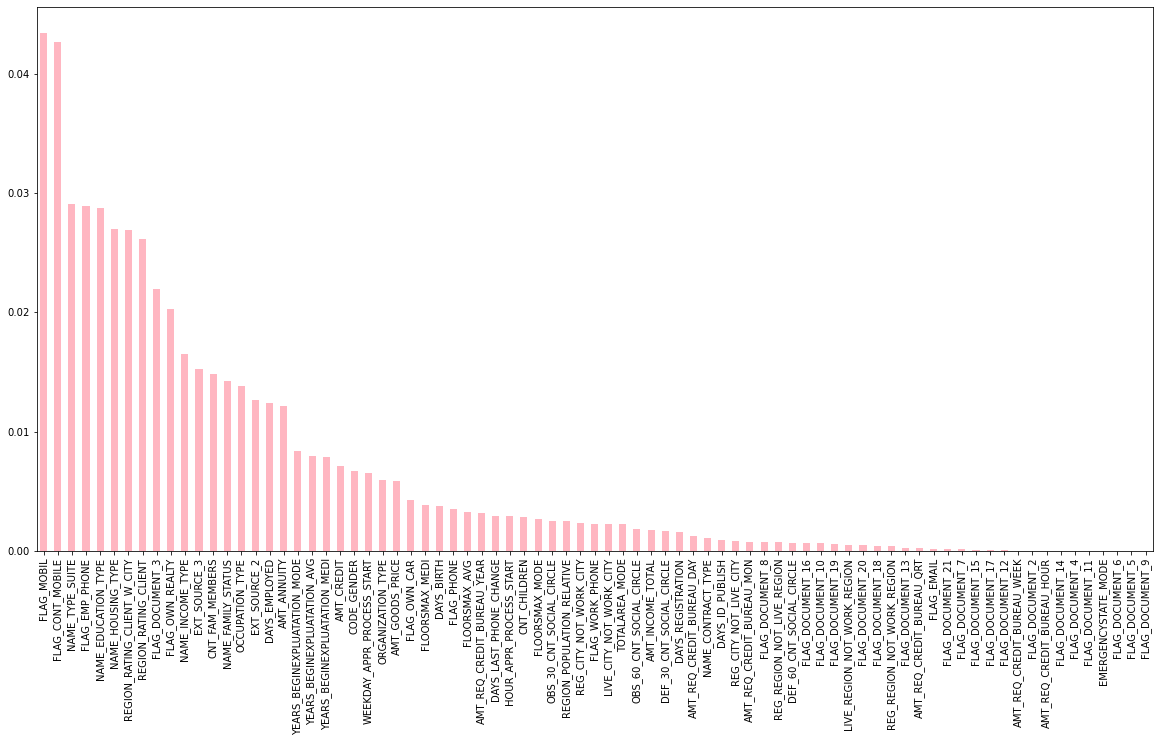

In [67]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,10),color='lightpink')

In [68]:
# Select K best features
k_percentile_features = SelectPercentile(mutual_info_classif, percentile=20).fit(x_train, y_train)
print('Selected top 20 percentile features: {}'.format(x_train.columns[k_percentile_features.get_support()]))

Selected top 20 percentile features: Index(['FLAG_OWN_REALTY', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_3'],
      dtype='object')


In [69]:
mi_x_train = k_percentile_features.transform(x_train)
mi_x_train.shape

(205936, 16)

In [70]:
Y = np.array(df_new['TARGET'])

X = df_new[['FLAG_OWN_REALTY', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_3']]

# compare original df, mi df, oversampling? 

In [92]:
def run_DecisionTree(x_train, x_test, y_train, y_test,k):
    dt = DecisionTreeClassifier(random_state=39, max_depth=k)
    dt.fit(x_train, y_train)
    
    pred = dt.predict(x_test)
    print("Training Accuracy: ", dt.score(x_train, y_train))
    print("Testing Accuracy: ", dt.score(x_test, y_test))
    cr = classification_report(y_test,  pred)
    print(cr)

    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True,fmt="d")

In [72]:
def run_LogisticRegression(x_train, x_test, y_train, y_test):
    lr = LogisticRegression(random_state=39)
    lr.fit(x_train, y_train)
    
    pred = lr.predict(x_test)
    print("Training Accuracy: ", lr.score(x_train, y_train))
    print("Testing Accuracy: ", lr.score(x_test, y_test))
    cr = classification_report(y_test, pred)
    print(cr)

    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True,fmt="d")

In [73]:
def run_KNN(x_train, x_test, y_train, y_test,n):
    knn =  KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)

    pred = knn.predict(x_test)

    print("Training Accuracy: ", knn.score(x_train, y_train))
    print('Testing Accuarcy: ', knn.score(x_test, y_test))
    #classification report
    cr = classification_report(y_test, pred)
    print(cr)

    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True,fmt="d")

#smote graph https://github.com/VVVENIIDIICI/Class-Imbalance
SMOTE ed but can't gen graph to illustrate, splited in kfold 1:46 

In [76]:
def run_smote(x_train,y_train,y_test):
    oversample = SMOTE(sampling_strategy='minority',random_state=0)
    x_train_SMOTE, y_train_SMOTE = oversample.fit_resample(x_train, y_train)
    print("before SMOTE :", Counter(y_test))
    print("after SMOTE:", Counter(y_train_SMOTE))
    

# noraml split//SMOTE in mutual_info

In [96]:
X_train_SMOTE, X_test, Y_train_SMOTE, Y_test = train_test_split(X, Y, test_size= 0.3, random_state = 0)
print("Shape of X :", X.shape)
print("Shape of Y :", Y.shape)

print("Y.test :", Counter(Y_test))

print("Y.train :", Counter(Y_train))


Shape of X : (294195, 16)
Shape of Y : (294195,)
Y.test : Counter({0: 81059, 1: 7200})
Y.train : Counter({0: 188884, 1: 17052})


In [97]:
run_smote(X_train_SMOTE,Y_train_SMOTE,Y_test)

before SMOTE : Counter({0: 81059, 1: 7200})
after SMOTE: Counter({0: 188884, 1: 188884})


In [78]:
test_scores = []
train_scores = []

for i in range(1,8):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_SMOTE,Y_train_SMOTE)
    
    train_scores.append(knn.score(X_train_SMOTE,Y_train_SMOTE))
    test_scores.append(knn.score(X_test,Y_test))

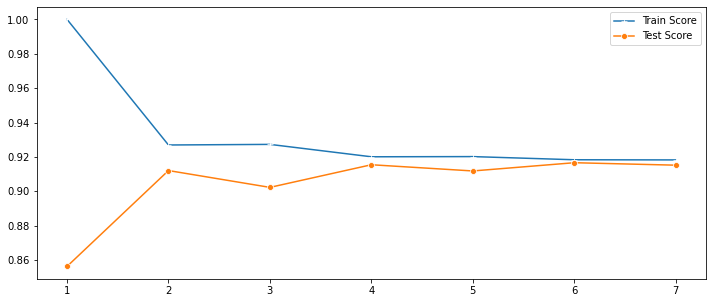

In [80]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,8),train_scores,marker='+',label='Train Score')
p = sns.lineplot(range(1,8),test_scores,marker='o',label='Test Score')

Training Accuracy:  0.9183338512936058
Testing Accuarcy:  0.9166090710295833
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81059
           1       0.20      0.01      0.01      7200

    accuracy                           0.92     88259
   macro avg       0.56      0.50      0.49     88259
weighted avg       0.86      0.92      0.88     88259



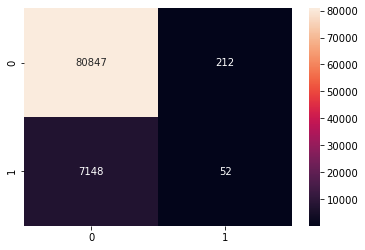

In [81]:
run_KNN(X_train_SMOTE,X_test,Y_train_SMOTE,Y_test,6)

In [99]:
dt_test_scores = []
dt_train_scores = []

for k in range(1,8):

    dt = DecisionTreeClassifier(max_depth=k)
    dt.fit(X_train_SMOTE,Y_train_SMOTE)
    
    dt_train_scores.append(dt.score(X_train_SMOTE,Y_train_SMOTE))
    dt_test_scores.append(dt.score(X_test,Y_test))

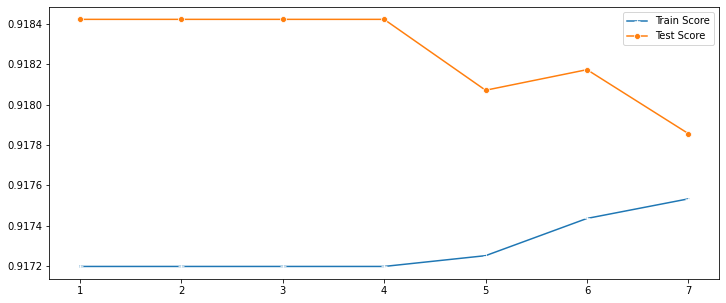

In [100]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,8),dt_train_scores,marker='+',label='Train Score')
p = sns.lineplot(range(1,8),dt_test_scores,marker='o',label='Test Score')

Training Accuracy:  0.9174355139460804
Testing Accuracy:  0.9181726509477787
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81059
           1       0.43      0.01      0.02      7200

    accuracy                           0.92     88259
   macro avg       0.67      0.50      0.49     88259
weighted avg       0.88      0.92      0.88     88259



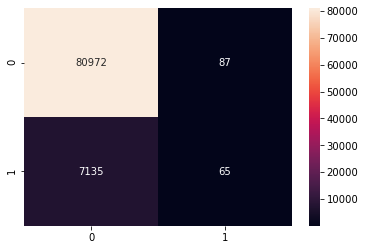

In [102]:
run_DecisionTree(X_train_SMOTE,X_test,Y_train_SMOTE,Y_test,6)

Training Accuracy:  0.917197575945925
Testing Accuracy:  0.918421917311549
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81059
           1       0.00      0.00      0.00      7200

    accuracy                           0.92     88259
   macro avg       0.46      0.50      0.48     88259
weighted avg       0.84      0.92      0.88     88259



/Users/iris/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


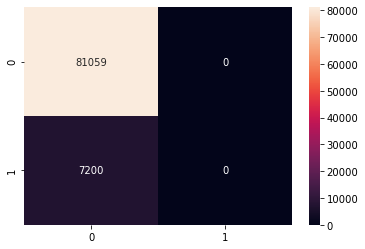

In [83]:
run_LogisticRegression(X_train_SMOTE,X_test,Y_train_SMOTE,Y_test)

# kfold split//SMOTE in mutual_info

In [79]:
print('Class Ratio:',sum(df['TARGET'])/len(df['TARGET']))

Class Ratio: 0.08072881945686496


In [85]:
kfold = StratifiedKFold(n_splits=12, shuffle=True, random_state=0)

#for train_index, test_index in kfold.split(X, Y):
 #   x_train, x_test = x[train_index], x[test_index]
  #  y_train, y_test = y[train_index], y[test_index]



print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (205936, 79)
Shape of x_test : (88259, 79)
Shape of y_train : (205936,)
Shape of y_test : (88259,)


In [86]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 188884, 1: 17052})
Counter({0: 81059, 1: 7200})


In [87]:
test_scores = []
train_scores = []

for i in range(1,8):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

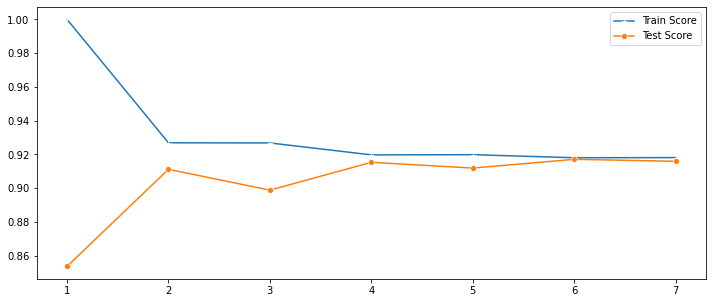

In [88]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,8),train_scores,marker='+',label='Train Score')
p = sns.lineplot(range(1,8),test_scores,marker='o',label='Test Score')

Training Accuracy:  0.9180667780281252
Testing Accuarcy:  0.9171302643356485
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81059
           1       0.18      0.00      0.01      7200

    accuracy                           0.92     88259
   macro avg       0.55      0.50      0.48     88259
weighted avg       0.86      0.92      0.88     88259



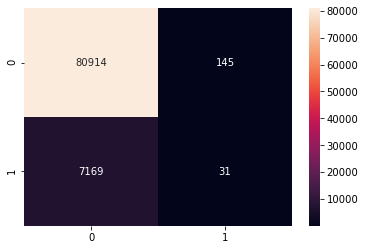

In [91]:
run_KNN(x_train,x_test,y_train,y_test,6)

In [111]:
dt_test_scores = []
dt_train_scores = []

for k in range(1,10):

    dt = DecisionTreeClassifier(max_depth=k)
    dt.fit(x_train,y_train)
    
    dt_train_scores.append(dt.score(x_train,y_train))
    dt_test_scores.append(dt.score(x_test,y_test))

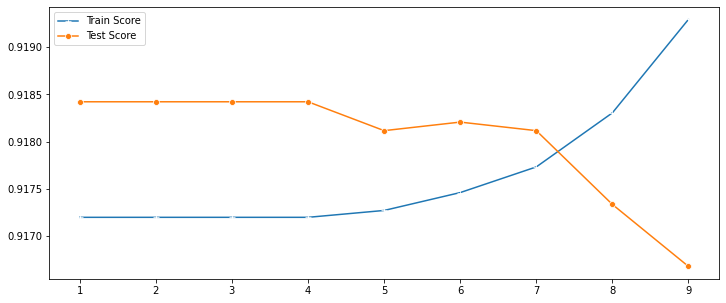

In [112]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),dt_train_scores,marker='+',label='Train Score')
p = sns.lineplot(range(1,10),dt_test_scores,marker='o',label='Test Score')

Training Accuracy:  0.9177317224768861
Testing Accuracy:  0.918104669212205
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81059
           1       0.41      0.01      0.02      7200

    accuracy                           0.92     88259
   macro avg       0.66      0.50      0.49     88259
weighted avg       0.88      0.92      0.88     88259



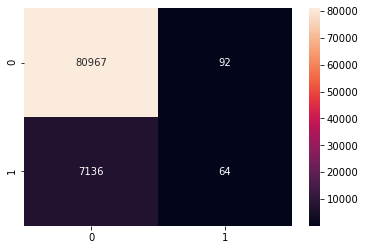

In [109]:
run_DecisionTree(x_train,x_test,y_train,y_test,7)

Training Accuracy:  0.9192904591717815
Testing Accuracy:  0.916631731608108
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81059
           1       0.30      0.02      0.03      7200

    accuracy                           0.92     88259
   macro avg       0.61      0.51      0.49     88259
weighted avg       0.87      0.92      0.88     88259



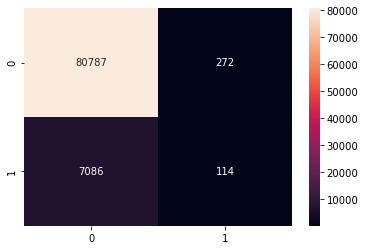

In [113]:
run_DecisionTree(x_train,x_test,y_train,y_test,9)

Training Accuracy:  0.948828762333929
Testing Accuracy:  0.8946509704392753
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     81059
           1       0.19      0.09      0.12      7200

    accuracy                           0.89     88259
   macro avg       0.56      0.53      0.53     88259
weighted avg       0.86      0.89      0.88     88259



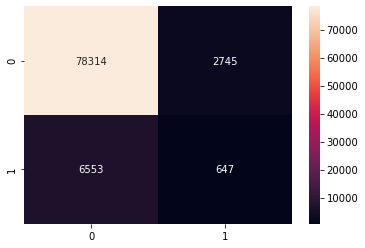

In [114]:
run_DecisionTree(x_train,x_test,y_train,y_test,17)

Training Accuracy:  0.9888363375029136
Testing Accuracy:  0.8598896429825853
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     81059
           1       0.15      0.15      0.15      7200

    accuracy                           0.86     88259
   macro avg       0.54      0.54      0.54     88259
weighted avg       0.86      0.86      0.86     88259



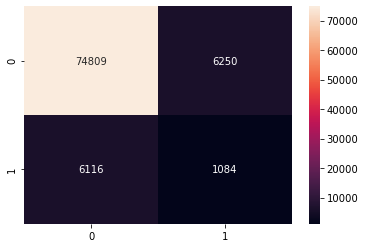

In [116]:
run_DecisionTree(x_train,x_test,y_train,y_test,27)

Training Accuracy:  0.9944642995882216
Testing Accuracy:  0.8529441756648047
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     81059
           1       0.14      0.16      0.15      7200

    accuracy                           0.85     88259
   macro avg       0.53      0.54      0.53     88259
weighted avg       0.86      0.85      0.86     88259



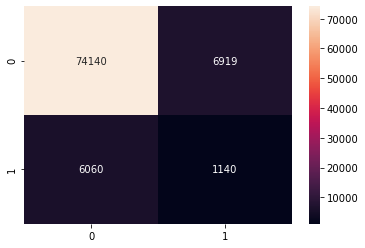

In [118]:
run_DecisionTree(x_train,x_test,y_train,y_test,30)

/Users/iris/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy:  0.917197575945925
Testing Accuracy:  0.918421917311549
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     81059
           1       0.00      0.00      0.00      7200

    accuracy                           0.92     88259
   macro avg       0.46      0.50      0.48     88259
weighted avg       0.84      0.92      0.88     88259



/Users/iris/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


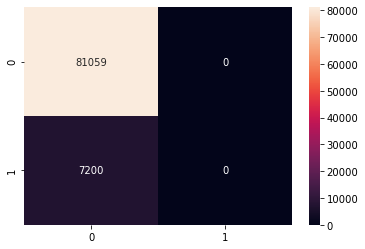

In [89]:
run_LogisticRegression(x_train,x_test,y_train,y_test)